# Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.

Why do we need?
Gradient boosting models are becoming popular because of their effectiveness at classifying complex datasets, and have recently been used to win many Kaggle data science competitions.

In [45]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from pprint import pprint

In [47]:
cleaned = pd.read_csv('../3.Preprocessing/cleaned_dataset.csv')
cleaned["attack_cat"]


0            Normal
1            Normal
2            Normal
3            Normal
4            Normal
            ...    
257668      Generic
257669    Shellcode
257670      Generic
257671      Generic
257672      Generic
Name: attack_cat, Length: 257673, dtype: object

        dur  spkts  dpkts  sbytes  dbytes         rate  sttl  dttl  \
0  0.000011      2      0     496       0   90909.0902   254     0   
1  0.000008      2      0    1762       0  125000.0003   254     0   

         sload  dload  ...  state_CON  state_ECO  state_FIN  state_INT  \
0  180363632.0    0.0  ...        0.0        0.0        0.0        1.0   
1  881000000.0    0.0  ...        0.0        0.0        0.0        1.0   

   state_PAR  state_REQ  state_RST  state_URN  state_no  label  
0        0.0        0.0        0.0        0.0       0.0      0  
1        0.0        0.0        0.0        0.0       0.0      0  

[2 rows x 198 columns]


In [16]:
cleaned = pd.get_dummies(cleaned,columns= ['attack_cat'])

In [35]:
Y = cleaned['label']
X = cleaned.drop(['label'],axis=1)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split( X,Y, test_size=0.3, random_state = 0) 

In [37]:
 #Create a GradientBoostingClassifier Classifier
model = GradientBoostingClassifier(learning_rate=0.5, max_depth=3)

In [38]:
print('Parameters currently in use:\n')
print(model.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.5, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [39]:
model.fit(X_train,y_train)

C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier(learning_rate=0.5)

In [40]:
y_pred = model.predict(X_test)

AttributeError: module 'matplotlib' has no attribute 'title'

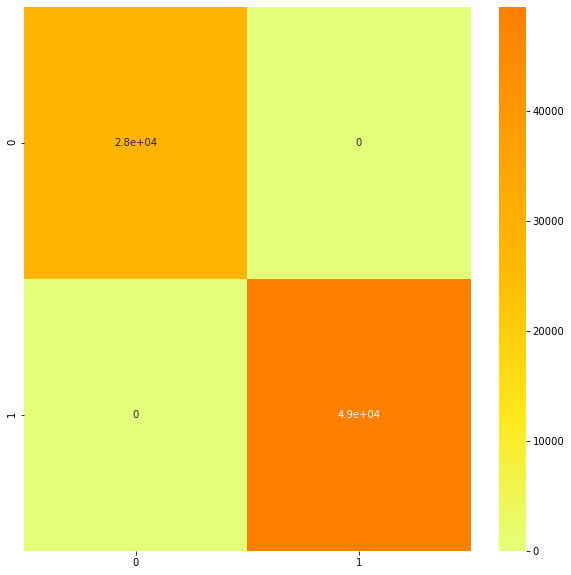

In [42]:
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap = "Wistia")
plt.title('Confusion Matrix for Logistic Regression', fontsize= 15)
plt.show()
#print("Confusion Matrix:")
#print(confusion_matrix(y_test, predictions))

In [43]:
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     27892
           1       0.92      0.95      0.94     49410

    accuracy                           0.92     77302
   macro avg       0.92      0.91      0.91     77302
weighted avg       0.92      0.92      0.92     77302



In [44]:
prediction = model.predict((np.array([[40,330,220]])))
print("T", prediction)

ValueError: X has 3 features, but DecisionTreeRegressor is expecting 206 features as input.